### **<center><font style="color:rgb(100,109,254)">Contour Detection Part 1: The Basics </font> </center>**

Contour detection is a popular computer vision technique used for analyzing objects in an image. Contours are a useful tool for shape analysis, object detection and recognition.

<center>
<img src="https://drive.google.com/uc?export=download&id=1yAoM5mODlkGIlfYn-dvCnpBPKycDsseJ" width=600>
</center>

<br>
A contour can be simply defined as a curve that joins a set of points enclosing an area having the same color or intensity. This area of uniform color or intensity forms the object that we are trying to detect, and the curve enclosing this area is the contour representing the shape of the object. So essentially, contour detection works similarly to edge-detection but with the restriction that the edges detected must form a closed path. 

In OpenCV contour detection can be performed with the help of function **`cv2.findContours()`** which we will discuss below along with the other important steps you need to perform to effectively detect the contours.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path ="C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\Pics+scripts\\Pictures"

(-0.5, 2079.5, 820.5, -0.5)

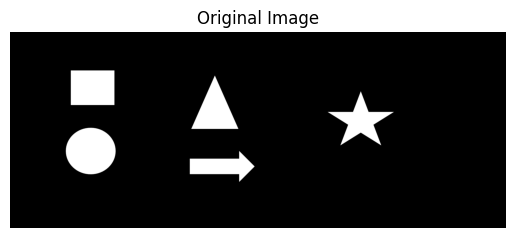

In [3]:
# read image
image = cv.imread(path + "\\icons01.png")

# plot using matplotlib library
plt.figure(1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

## **<font style="color:rgb(134,19,348)"> Detecting contours in an image </font>**
OpenCV saves us the trouble of having to write lengthy algorithms for contour detection and provides a handy function **`findContours()`** that analysis the [topological structure of the binary image by border following](https://www.sciencedirect.com/science/article/abs/pii/0734189X85900167), a contour detection technique developed in 1985.

The **`findContours()`** functions takes a binary image as input. The foreground is assumed to be white, and the background is assumed to be black. If that is not the case, then you can invert the image using the [**```cv2.bitwise_not()```**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f) function.

#### **Function Syntax:**


> [**```contours, hierarchy =   cv2.findContours(image, mode, method, contours, hierarchy, offset)```**](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a)

**Parameters:**

* **```image```** - It is the input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary. You can use compare, inRange, threshold, adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one.

* **```mode```** - It is the contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE )

* **```method```** - It is the contour approximation method. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1, etc )

* **```offset```** - It is the optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI, and then they should be analyzed in the whole image context.

**Returns:**

* **```contours```** - It is the detected contours. Each contour is stored as a vector of points.

* **```hierarchy```** - It is the optional output vector containing information about the image topology. It has been described in detail in the video above.

<br>

We will go through all the important parameters in detail. For now, let's detect some contours in the image that we read above.

Since the image contains only contains a single-channel instead of three. And even that channel is in binary state  (black & White) so it can be directly passed to the **`findContours()`** function.

In [4]:
# convert to gray before moving countoring
grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# now find all contours in the image
contours, hierarchy = cv.findContours(grayImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
lenghthOfContours = len(contours)
print("the total number of contours in the image:" + str(lenghthOfContours))


the total number of contours in the image:5


## **<font style="color:rgb(134,19,348)">Visualizing the contours detected</font>**
As you can see the **`cv2.findContours()`** function was able to correctly detect the 5 external shapes in the image. But to visualize these results we can use the **`cv2.drawContours()`** function which simply draws the contours onto an image.

#### **Function Syntax:**


> [**```cv2.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)```**](https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)

**Parameters:**

* **```image```** - It is the image on which contours are to be drawn.
* **```contours```** -  It is point vector(s) representing the contour(s). It is usually an array of contours.
* **```contourIdx```** - It is the parameter, indicating a contour to draw. If it is negative, all the contours are drawn.
* **```color```** - It is the color of the contours.
* **```thickness```** - It is the thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
* **```lineType```** -  It is the type of line. You can find the possible options [here](https://docs.opencv.org/3.4/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777).
* **```hierarchy```** - It is the optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
* **```maxLevel```** -  It is the maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is a hierarchy available.
* **```offset```** - It is the optional contour shift parameter. Shift all the drawn contours by the specified offset=(dx, dy).

To prevent the original image from being overwritten, we use **`np.copy()`** for drawing the contours on a copy of the image.

(-0.5, 2079.5, 820.5, -0.5)

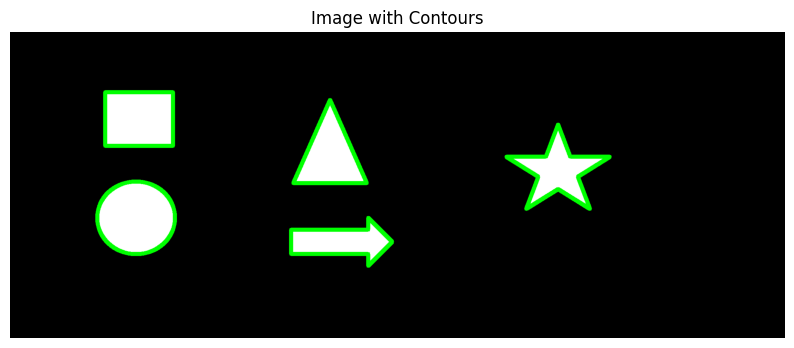

In [5]:
# make copy of original image
imgCopy = image.copy()

# draw all contours
cv.drawContours(imgCopy, contours, -1, (0,255,0), 10)


plt.figure(figsize= [10,10])
plt.imshow(imgCopy)
plt.title("Image with Contours")
plt.axis("off")

## **<font style="color:rgb(134,19,348)">Pre-processing images For Contour Detection</font>**

As you have seen above that the **`cv2.findContours()`** functions take in as input a single channel binary image, however, in most cases the original image will not be a binary image. Detecting contours in colored images require pre-processing to produce a single-channel binary image that can be then used for contour detection. 

The two most commonly used techniques for this pre-processing are:

* **Thresholding based Pre-processing**
* **Edge Based Pre-processing**

Below we will see how you can accurately detect contours using these techniques.

### **<font style="color:rgb(134,19,348)">Thresholding based Pre-processing For Contours</font>**

So to detect contours in colored images we can perform fixed level image thresholding to produce a **binary image** that can be then used for contour detection.
<br>
<br>
<center>
<img src="https://drive.google.com/uc?export=download&id=16q8JI_tS0RUR0VQHW2bfvhSGh0hHAMbc">
</center>
<br>

All images are read using [**`cv2.imread()`**](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) function which reads the image in **BGR** format but since [**`plt.imshow()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) displays the image in **RGB** format we reverse the channels using [**NumPy**](https://numpy.org/doc/stable/reference/arrays.indexing.html). 

(-0.5, 533.5, 654.5, -0.5)

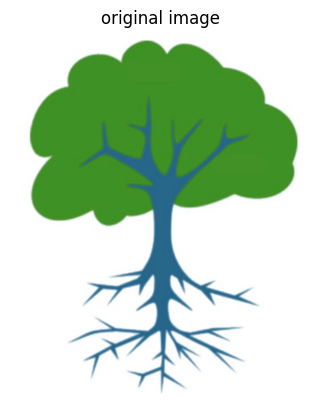

In [6]:
# read an image
img2 = cv.imread(path + "\\tree.jpg")

# display 
plt.figure(1)
plt.imshow(img2)
plt.title("original image")
plt.axis("off")


Lets have a look at how the results will look like if contour detection is performed without using thresholding.

We also need to convert the 3-channel BGR image to single-channel image using the [**`cv2.cvtColor()`**](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function.

(655, 534, 3)
(655, 534)


(-0.5, 533.5, 654.5, -0.5)

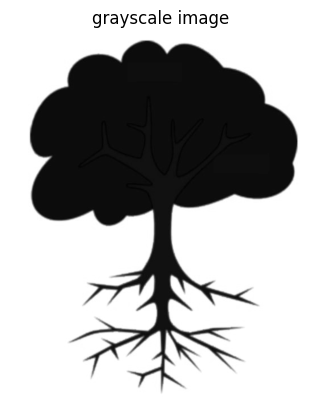

In [7]:
# make copy 
copyImg = np.copy(img2)
print(copyImg.shape)

# convert it to gray
imgGray = cv.cvtColor(copyImg, cv.COLOR_BGR2GRAY)
print(imgGray.shape)

# display 
plt.figure(2)
plt.imshow(imgGray, cmap="gray")
plt.title("grayscale image")
plt.axis("off")


Contour detection on the image above will only result in a contour outlining the edges of the image. This is because the **`cv2.findContours()`** function expects the foreground to be white, and the background to be black, which is not the case above so we need to invert the colors using **```cv2.bitwise_not()```**.

(-0.5, 533.5, 654.5, -0.5)

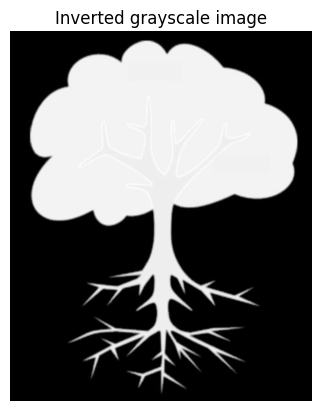

In [8]:
# now invert the color using bitwise not
invertGray = cv.bitwise_not(imgGray)

# display 
plt.figure(3)
plt.imshow(invertGray, cmap="gray")
plt.title("Inverted grayscale image")
plt.axis("off")


The inverted image with black background and white foreground can now be used for contour detection.

(-0.5, 533.5, 654.5, -0.5)

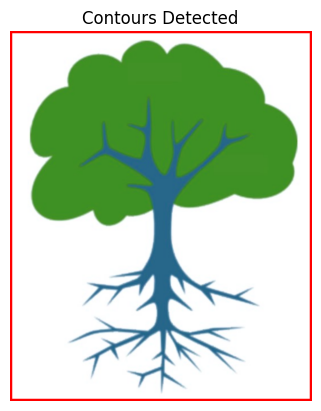

In [14]:
# now find the contours
contours, hierarchy = cv.findContours(imgGray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# draw all contours
cv.drawContours(copyImg, contours, -1, (255, 0, 0), 5)

# Display the result  
plt.imshow(copyImg)
plt.title("Contours Detected")
plt.axis("off")

As you can see the contours detected poorly align with the boundary of the tree in the image. This is because we only fulfilled the requirement of a single channel image but we did not make sure that the image was binary in colors, resulting in noise along the edges. This is why we need thresholding to provide us a binary image.

#### **Thresholding the image**

We will use the function [**`cv2.threshold()`**](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) to perform thresholding. The function takes in as input the gray-scale image, applies fixed level thresholding, and returns a binary image. In this case, all the pixel values below 100 are set to 0(black) while the ones above are set to 255(white). Since the image has already been inverted **`cv2.THRESH_BINARY`** is used, but if the image is not inverted **`cv2.THRESH_BINARY_INV`** should be used.

10.0


(-0.5, 533.5, 654.5, -0.5)

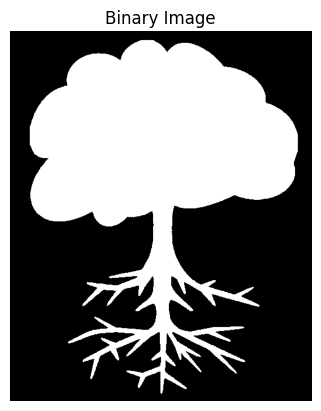

In [11]:
ret, binaryThresh = cv.threshold(invertGray, 10, 255, cv.THRESH_BINARY)
print(ret)

# Display the result 
plt.imshow(binaryThresh, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

(-0.5, 533.5, 654.5, -0.5)

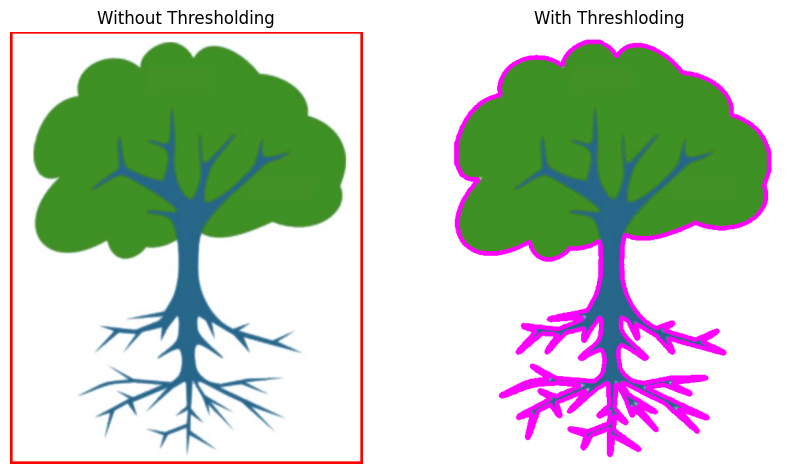

In [12]:
# make another copy
copyImg2 = img2.copy()

# now find the contours
contours, hierarchy = cv.findContours(binaryThresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# draw all contours
cv.drawContours(copyImg2, contours, -1, (255, 0, 255), 5)

# Plot both of the resuts for comparison
plt.figure(figsize=[10, 10])
plt.subplot(121)
plt.imshow(copyImg)
plt.title("Without Thresholding")
plt.axis('off')
plt.subplot(122)
plt.imshow(copyImg2)
plt.title("With Threshloding")
plt.axis('off')

As you can see the results achieved after thresholding are accurate.


### **<font style="color:rgb(134,19,348)">Edge Based Pre-processing For Contours</font>**
Thresholding works out well for simple images with fewer variations in colors, however, for complex images, it's not always easy to do background-foreground segmentation using thresholding. In these cases creating the binary image using edge detection yields better results.
<br>
<br>
<center>
<img src="https://drive.google.com/uc?export=download&id=13V6h38cm0oEwSbG6biVtqWghLj66GhIO">
</center>

(-0.5, 863.5, 293.5, -0.5)

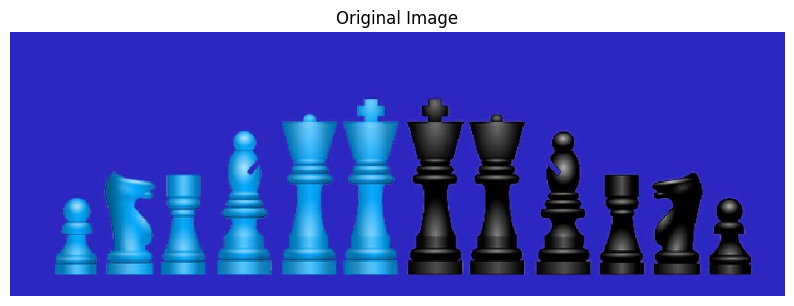

In [15]:
# Read the image
image3 = cv.imread(path + '\\chess.jpg') 

# Display the image
plt.figure(figsize=[10,10])
plt.imshow(image3)
plt.title("Original Image")
plt.axis("off")

 We will use function [**`cv2.Canny()`**](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) for detecting the edges in the image. **`cv2.Canny()`** returns a single channel binary image which is all we need to perform contour detection in the next step. We also make use of the [**`cv2.GaussianBlur()`**](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function to remove noise from the image.

(-0.5, 863.5, 293.5, -0.5)

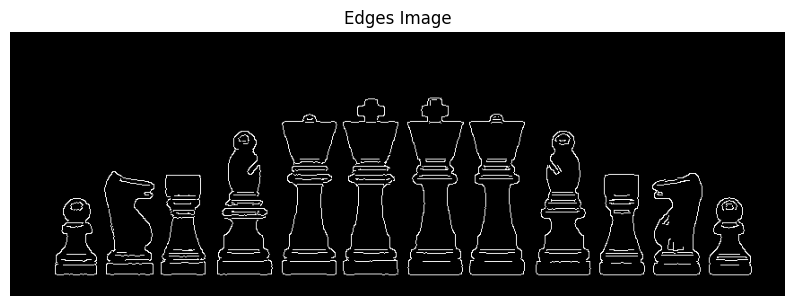

In [16]:
cp = image3.copy()

# Blur the image to remove noise
blurred_image = cv.GaussianBlur(cp,(5,5),0)

# Apply canny edge detection
edges = cv.Canny(blurred_image, 100, 160)

# Display the resultant binary image of edges
plt.figure(figsize=[10,10])
plt.imshow(edges,cmap='gray')
plt.title("Edges Image")
plt.axis("off")

(-0.5, 863.5, 293.5, -0.5)

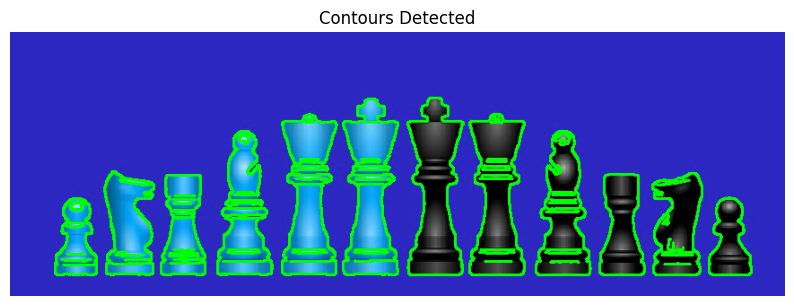

In [17]:
# Detect the contour using the using the edges
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours
image3_copy = image3.copy()

cv.drawContours(image3_copy, contours, -1, (0, 255, 0), 2)

# Display the drawn contours
plt.figure(figsize=[10,10])
plt.imshow(image3_copy)
plt.title("Contours Detected")
plt.axis("off")

In comparison, if we were to use thresholding as before it would yield poor result that will only manage to correctly outline half of the chess pieces in the image at a time. So for a fair comparison, we will use [**`cv2.adaptiveThreshold()`**](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3) to perform adaptive thresholding which adjusts to different color intensities in the image.

(-0.5, 863.5, 293.5, -0.5)

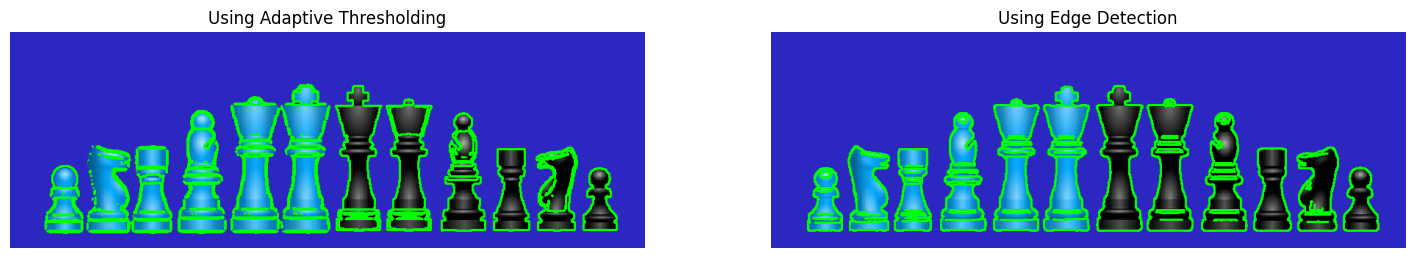

In [18]:
image3_copy2 = image3.copy()

# Remove noise from the image
blurred = cv.GaussianBlur(image3_copy2,(3,3),0)

# Convert the image to gray-scale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Perform adaptive thresholding 
binary = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV, 11, 5)

# Detect and Draw contours
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image3_copy2, contours, -1, (0, 255, 0), 2)

# Plotting both results for comparison
plt.figure(figsize=[18,18])
plt.subplot(121)
plt.imshow(image3_copy2)
plt.title("Using Adaptive Thresholding")
plt.axis('off')
plt.subplot(122)
plt.imshow(image3_copy)
plt.title("Using Edge Detection")
plt.axis('off')

As can be seen above, using canny edge detection results in finer contour detection.

## **<font style="color:rgb(134,19,348)">Drawing a selected Contour</font>**

The **`contours`** returned by the **`cv2.findContours()`** is a python **`list`** where the **ith** element is the contour for a certain shape in the image. Therefore if we are interested in just drawing one of the contours we can index it from the **`contours`** list and the selected contour only.

Text(0.5, 1.0, 'Selected Contour: 2')

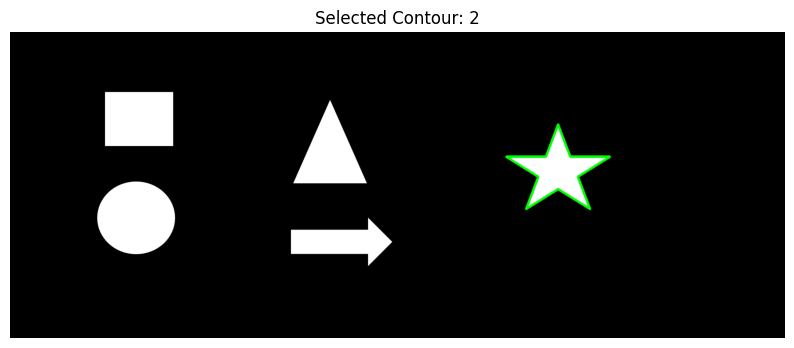

In [21]:
image1_copy = image.copy()

# Find all contours in the image.
contours, hierarchy = cv.findContours(grayImage, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Select a contour
index = 2
contour_selected = contours[index]

# Draw the selected contour
cv.drawContours(image1_copy, contours, index, (0,255,0), 6)

# Display the result
plt.figure(figsize=[10,10])
plt.imshow(image1_copy)
plt.axis("off")
plt.title('Selected Contour: ' + str(index))

Now we modify our code using a for loop to draw all of the contours separately.

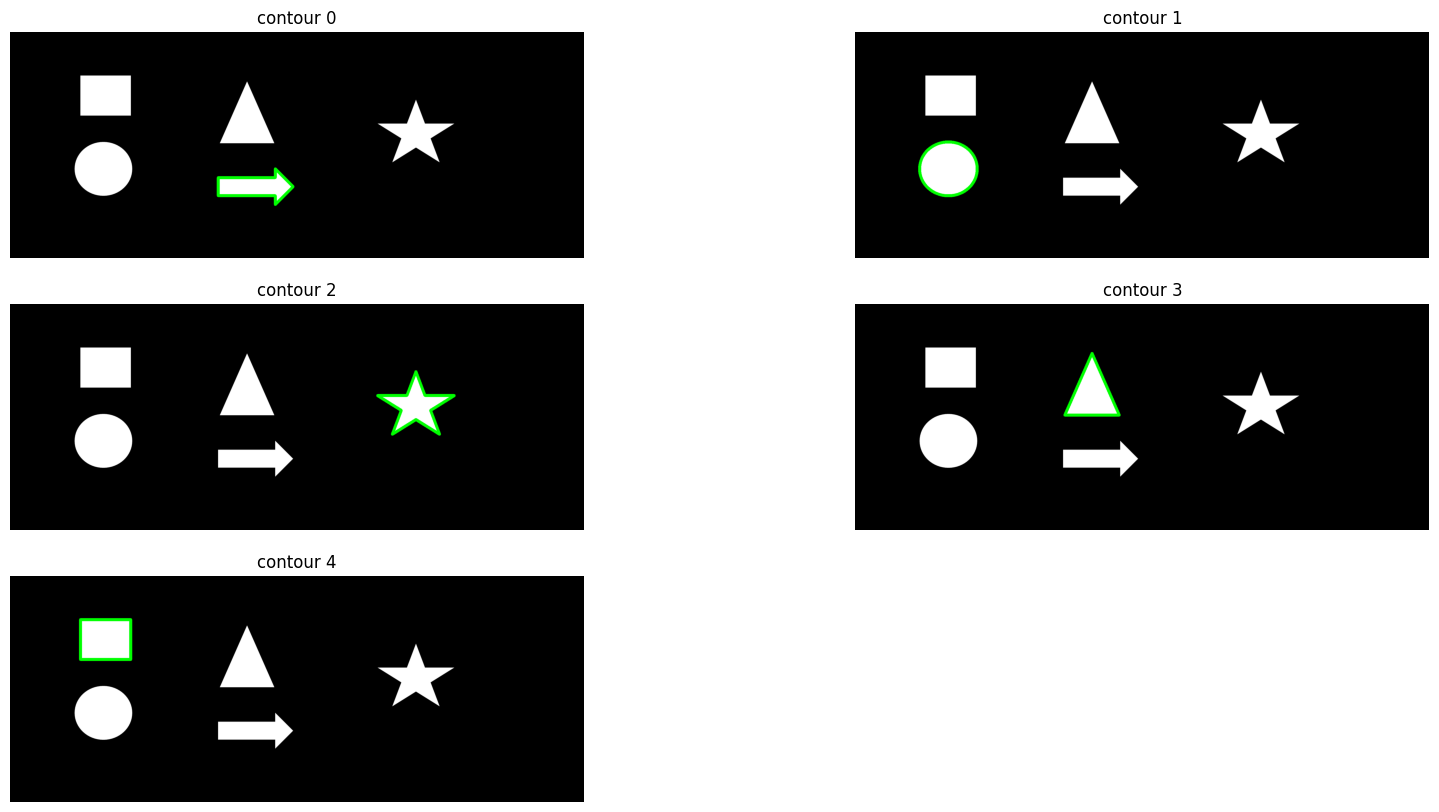

In [22]:
image1_copy = image.copy()

# Create a figure object for displaying the images
plt.figure(figsize=[20,10])

# Convert to grayscale.
imageGray = cv.cvtColor(image1_copy, cv.COLOR_BGR2GRAY)

# Find all contours in the image
contours, hierarchy = cv.findContours(imageGray, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Loop over the contours
for i,cont in enumerate(contours):
        
        # Draw the ith contour
        image1_copy = cv.drawContours(image.copy(), cont, -1, (0,255,0), 10)

        # Add a subplot to the figure
        plt.subplot(3, 2, i+1)  

        # Turn off the axis
        plt.axis("off");plt.title('contour ' +str(i))

        # Display the image in the subplot
        plt.imshow(image1_copy)

## **<font style="color:rgb(134,19,348)">Retrieval Modes</font>**
Function **`cv2.findContours()`** does not only returns the contours found in an image but also returns valuable information about the hierarchy of the contours in the image. The hierarchy encodes how the contours may be arranged in the image, e.g, they may be nested within another contour. Often we are more interested in some contours than others. For example, you may only want to retrieve the external contour of an object.

Using the Retrieval Modes specified, the **`cv2.findContours()`** function can determine how the contours are to be returned or arranged in a hierarchy.  For more information on Retrieval modes and contour hierarchy [Read here](https://docs.opencv.org/4.1.0/d9/d8b/tutorial_py_contours_hierarchy.html).

Some of the important retrieval modes are:

- **`cv2.RETR_EXTERNAL`** - retrieves only the extreme outer contours.
- **`cv2.RETR_LIST`** - retrieves all of the contours without establishing any hierarchical relationships.
- **`cv2.RETR_TREE`** - retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- **`cv2.RETR_CCOMP`** - retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

Below we will have a look at how each of these modes return the contours.


### **<font style="color:rgb(134,19,348)">cv2.RETR_LIST</font>**
**`cv2.RETR_LIST`** simply retrieves all of the contours without establishing any hierarchical relationships between them. All of the contours can be said to have no parent or child relationship with another contour.

Number of Contours Returned: 8


Text(0.5, 1.0, 'Retrieval Mode: RETR_LIST')

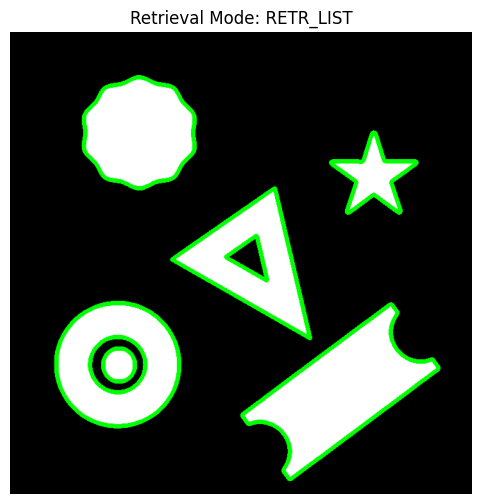

In [23]:
image1 = cv.imread(path +"\\Image.png")

image1_copy = image1.copy()

# Convert to gray-scale
imageGray = cv.cvtColor(image1_copy, cv.COLOR_BGR2GRAY)

# Find and return all contours in the image using the RETR_LIST mode
contours, hierarchy = cv.findContours(imageGray, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Draw all contours.
cv.drawContours(image1_copy, contours, -1, (0,255,0), 5)

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[6,6])
plt.imshow(image1_copy)
plt.axis("off")
plt.title('Retrieval Mode: RETR_LIST')

###  **<font style="color:rgb(134,19,348)">cv2.RETR_EXTERNAL</font>**
**`cv2.RETR_EXTERNAL`** retrieves only the extreme outer contours i.e the contours not having any parent contour.

Number of Contours Returned: 5


Text(0.5, 1.0, 'Retrieval Mode: RETR_EXTERNAL')

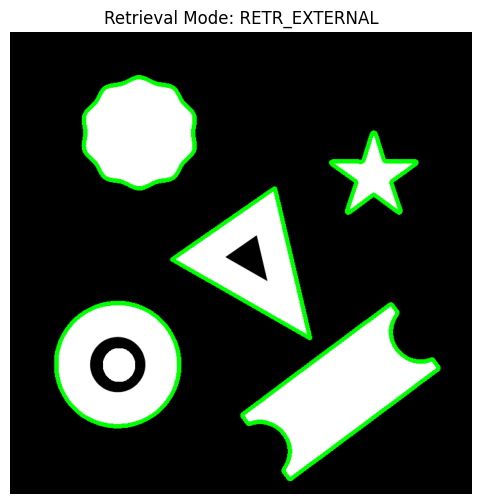

In [24]:
image1_copy = image1.copy()

# Find all contours in the image.
contours, hierarchy = cv.findContours(imageGray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw all the contours.
cv.drawContours(image1_copy, contours, -1, (0,255,0), 5)

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[6,6])
plt.imshow(image1_copy)
plt.axis("off")
plt.title('Retrieval Mode: RETR_EXTERNAL')

### **<font style="color:rgb(134,19,348)">cv2.RETR_TREE</font>**
**`cv2.RETR_TREE`** retrieves all of the contours and constructs a full hierarchy of nested contours.

[[[ 1 -1 -1 -1]
  [ 4  0  2 -1]
  [-1 -1  3  1]
  [-1 -1 -1  2]
  [ 6  1  5 -1]
  [-1 -1 -1  4]
  [ 7  4 -1 -1]
  [-1  6 -1 -1]]]
Number of Contours Returned: 8


Text(0.5, 1.0, 'Retrieval Mode: RETR_TREE')

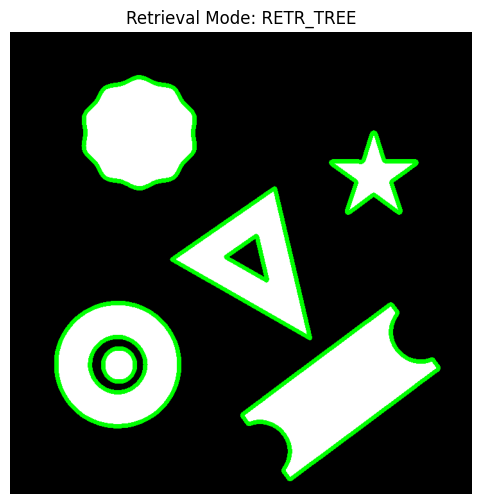

In [25]:
image1_copy = image1.copy()

# Find all contours in the image.
contours, hierarchy = cv.findContours(imageGray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# Draw all the contours.
cv.drawContours(image1_copy, contours, -1, (0,255,0), 5)

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[6,6])
plt.imshow(image1_copy)
plt.axis("off")
plt.title('Retrieval Mode: RETR_TREE')

### **<font style="color:rgb(134,19,348)">cv2.RETR_CCOMP</font>**
**`cv2.RETR_CCOMP`** retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the object. At the second level, there are boundaries of the holes in object. If there is another contour inside that hole, it is still put at the top level.

To visualize the two levels we check for the contours that do not have any parent i.e the fourth value in their hierarchy **[Next, Previous, First_Child, Parent]** is set to -1. These contours form the first level and are represented with green color while all other are second-level contours represented in red.

Number of Contours Returned: 8


Text(0.5, 1.0, 'Retrieval Mode: RETR_CCOMP')

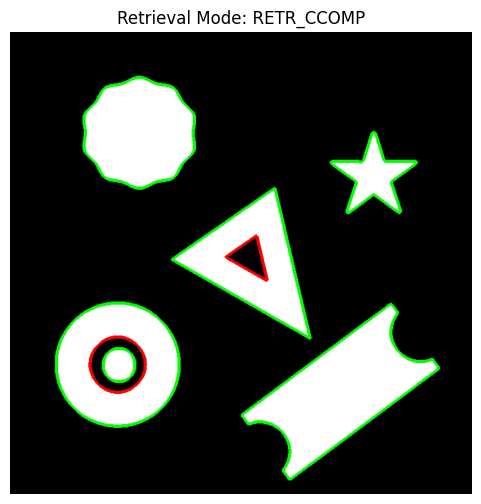

In [26]:
src_copy = image1.copy()
imageGray = cv.cvtColor(src_copy,cv.COLOR_BGR2GRAY)

# Find all contours in the image using RETE_CCOMP method 
contours, hierarchy = cv.findContours(imageGray, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

# Loop over all the contours detected
for i,cont in enumerate(contours):
    
    # If the contour is at first level draw it in green 
    if hierarchy[0][i][3] == -1:
        src_copy = cv.drawContours(src_copy, cont, -1, (0,255,0), 3)
    
    # elif hierarchy[0][i][3] == 2:
    #     src_copy = cv.drawContours(src_copy, cont, -1, (0,0,255), 3)

    # elif hierarchy[0][i][3] == 4:
    #     src_copy = cv.drawContours(src_copy, cont, -1, (255,0,0), 3)
    # else draw the contour in Red
    else:
        src_copy = cv.drawContours(src_copy, cont, -1, (255,0,0), 3)

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[6,6])
plt.imshow(src_copy)
plt.axis("off")
plt.title('Retrieval Mode: RETR_CCOMP')

## **<font style="color:rgb(134,19,348)"> Extracting the Largest Contour in the image</font>**

The contours detected are returned as a list of continuous coordinates that form the shape of the object. Using these coordinates and the built-in python's [**`max()`**](https://docs.python.org/3/library/functions.html#max) function we can retrieve the largest contour in the list. The **`max()`**  function takes in as input the contours list along with a **`key`** parameter which refers to the single argument function used to customize the sort order. The function is applied to each item on the iterable. For retrieving the largest contour we use the key [**`cv2.contourArea`**](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga2c759ed9f497d4a618048a2f56dc97f1) which is a function that returns the area of a contour. It is applied to each contour in the list and then the **`max()`** function returns the largest contour based on its area.

[[[592 424]]

 [[591 425]]

 [[590 425]]

 ...

 [[595 425]]

 [[594 424]]

 [[593 424]]]


(-0.5, 719.5, 719.5, -0.5)

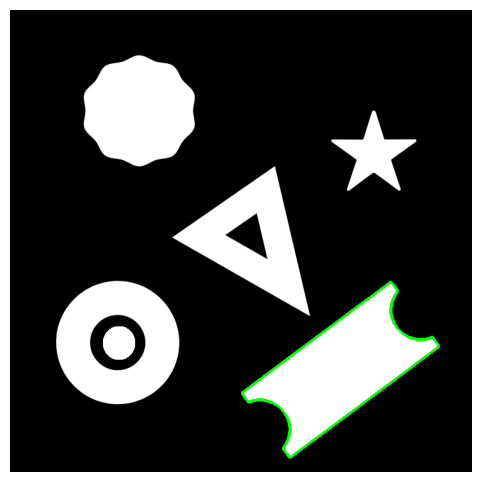

In [27]:
image1_copy = image1.copy()

# Convert to grayscale
gray_image = cv.cvtColor(image1_copy, cv.COLOR_BGR2GRAY)

# Find all contours in the image.
contours, hierarchy = cv.findContours(gray_image, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Retreive the biggest contour
biggest_contour = max(contours, key =cv.contourArea)
print(biggest_contour)

# Draw the biggest contour
cv.drawContours(image1_copy, biggest_contour, -1, (0,255,0), 4)

# Display the results
plt.figure(figsize=[6,6])
plt.imshow(image1_copy)
plt.axis("off")

## **<font style="color:rgb(134,19,348)"> Sorting Contours in terms of size</font>**

The **`max()`** function will only return the largest contour in the list. To compare all of the contours in the list another built-in python function [**`sorted()`**](https://docs.python.org/3/library/functions.html#sorted) can be used. **`sorted()`** function also takes in the optional **`key`** parameter which we use as before for returning the area of each contour. Then the contours are sorted based on area and the resultant list is returned. We also specify the order of sort **`reverse = True`** i.e in descending order of area size.

592 424
157 422
197 70
412 243
566 156
159 476
163 493
382 318


(-0.5, 719.5, 719.5, -0.5)

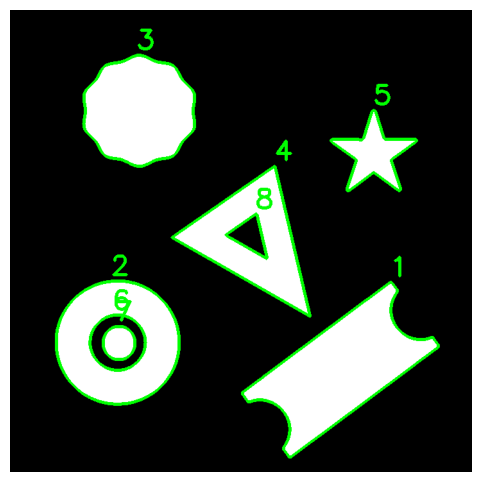

In [28]:
image1_copy = image1.copy()

# Convert to grayscale.
imageGray = cv.cvtColor(image1_copy,cv.COLOR_BGR2GRAY)

# Find all contours in the image.
contours, hierarchy = cv.findContours(imageGray, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

# Sort the contours in decreasing order
sorted_contours = sorted(contours, key=cv.contourArea, reverse= True)

# Draw largest 3 contours
for i, cont in enumerate(sorted_contours[:],1):

    # Draw the contour
    cv.drawContours(image1_copy, cont, -1, (0,255,0), 3)
    print(cont[0,0,0], cont[0,0,1])
    
    # Display the position of contour in sorted list
    cv.putText(image1_copy, str(i), (cont[0,0,0], cont[0,0,1]-10), cv.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0),4)


# Display the result
plt.figure(figsize=[6,6])
plt.imshow(image1_copy)
plt.axis("off")

##  **<font style="color:rgb(134,19,348)"> Drawing Convex Hull</font>**
Convex Hull is another way to draw the contour onto the image. The function **`cv2.convexHull()`**  checks a curve for convexity defects and corrects it. Convex curves are curves which are bulged out. And if it is bulged inside (Concave), it is called convexity defects.

**Function Syntax:**

> [**`hull = cv2.convexHull(points, hull, clockwise, returnPoints)`**](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656)

**Parameters:**

*  **`points`** - Input 2D point set. This is a single contour.
*  **`clockwise`** - Orientation flag. If it is true, the output convex hull is oriented clockwise. Otherwise, it is oriented counter-clockwise. The assumed coordinate system has its X axis pointing to the right, and its Y axis pointing upwards.
*  **`returnPoints`** - Operation flag. In case of a matrix, when the flag is true, the function returns convex hull points. Otherwise, it returns indices of the convex hull points. By default it is True.

**Returns:**

*  **`hull`** - Output convex hull. It is either an integer vector of indices or vector of points. In the first case, the hull elements are 0-based indices of the convex hull points in the original array (since the set of convex hull points is a subset of the original point set). In the second case, hull elements are the convex hull points themselves.

(-0.5, 533.5, 654.5, -0.5)

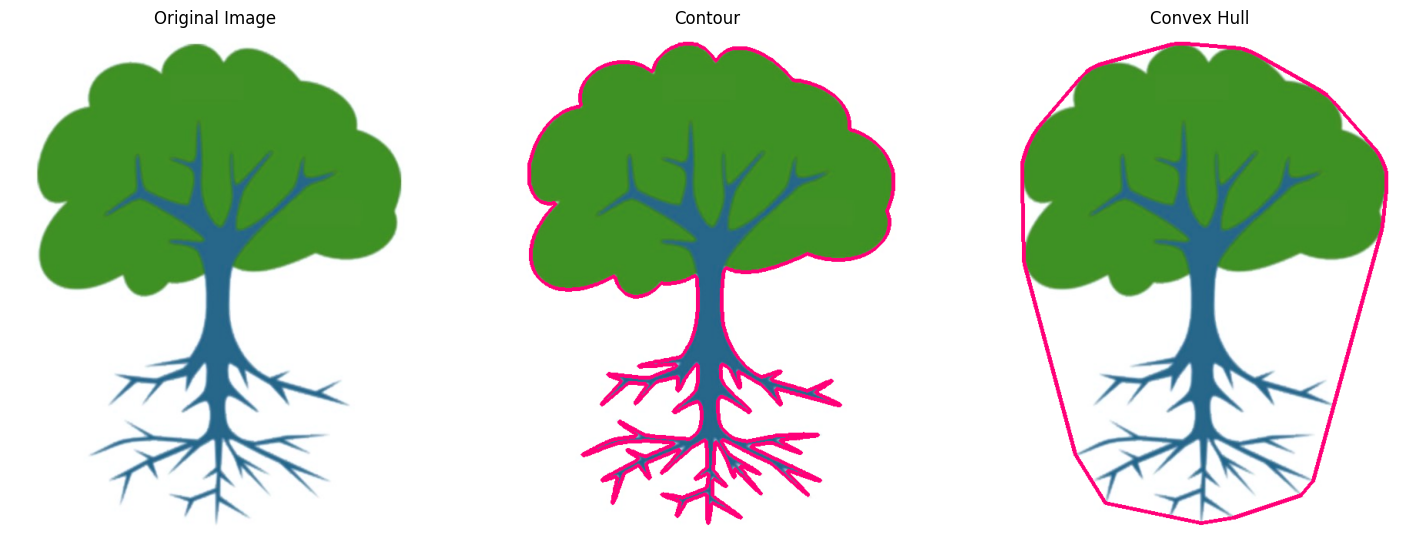

In [29]:
image2 = cv.imread(path + '\\tree.jpg')

hull_img = image2.copy()
contour_img = image2.copy()

# Convert the image to gray-scale
gray = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

# Create a binary thresholded image
_, binary = cv.threshold(gray, 230, 255, cv.THRESH_BINARY_INV)

# Find the contours from the thresholded image
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Since the image only has one contour, grab the first contour
cnt = contours[0]

# Get the required hull
hull = cv.convexHull(cnt)

# draw the hull
cv.drawContours(hull_img, [hull], 0 , (255,0,120), 3) 

# draw the contour
cv.drawContours(contour_img, [cnt], 0, (255,0,120), 3)

plt.figure(figsize=[18,18])
plt.subplot(131)
plt.imshow(image2)
plt.title("Original Image")
plt.axis('off')
plt.subplot(132)
plt.imshow(contour_img)
plt.title("Contour")
plt.axis('off')
plt.subplot(133)
plt.imshow(hull_img)
plt.title("Convex Hull")
plt.axis('off')

## **<font style="color:rgb(134,19,348)">Image Moments</font>**

Image moments are like the weighted average of the pixel intensities in the image, they help you to calculate some features like the center of mass of the object, area of the object, etc. 
We can get the image moment of this contour by using the function **`cv2.moments()`** which gives us a dictionary of various properties to use.

**Function Syntax:**

> [**`retval = cv.moments(array)`**](https://docs.opencv.org/4.2.0/d8/d23/classcv_1_1Moments.html#a0382b98fdb23acdcb05c91a2a44e5a1f)


**Parameters:**

* **`array`** - Single-channel, 8-bit or floating-point 2D array

**Returns:**

* **`retval`** - A python dictionary containing different moments properties 

{'m00': 28977.5, 'm10': 4850112.666666666, 'm01': 15004570.666666666, 'm20': 878549048.4166666, 'm11': 2511467783.458333, 'm02': 7836261882.75, 'm30': 169397190630.30002, 'm21': 454938259986.68335, 'm12': 1311672140996.85, 'm03': 4126888029899.3003, 'mu20': 66760837.58548939, 'mu11': 75901.88486719131, 'mu02': 66884231.43453884, 'mu30': 1727390.3746643066, 'mu21': -487196.02967071533, 'mu12': -1770390.7230567932, 'mu03': 495214.8310546875, 'nu20': 0.07950600793808808, 'nu11': 9.03921532296414e-05, 'nu02': 0.07965295864597088, 'nu30': 1.2084764986041665e-05, 'nu21': -3.408407043976586e-06, 'nu12': -1.238559397771768e-05, 'nu03': 3.4645063088656135e-06}


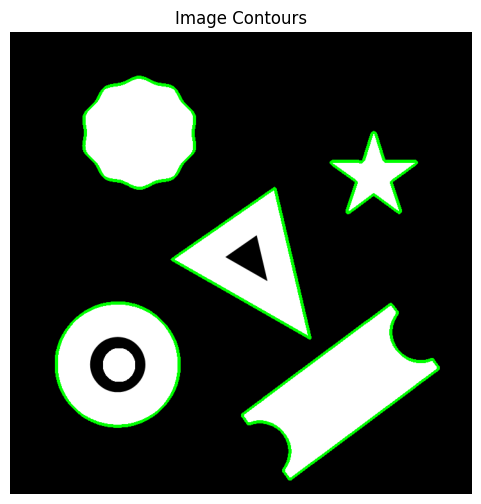

In [134]:
image1_copy = image1.copy()

# Convert to grayscale
gray_scale = cv.cvtColor(image1_copy,cv.COLOR_BGR2GRAY)

# Find all contours in the image
contours, hierarchy = cv.findContours(gray_scale, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Draw all the contours.
contour_image = cv.drawContours(image1_copy, contours, -1, (0,255,0), 3)

# Display the results.
plt.figure(figsize=[6,6])
plt.imshow(contour_image)
plt.title("Image Contours")
plt.axis("off")

# Select a contour
contour = contours[1]

# get its moments
M = cv.moments(contour)

# print all the moments
print(M)

The values returned represent different kinds of image movements including raw moments, central moments, scale/rotation invariant moments, and so on. For more information on image moments and how they are calculated you can read [this](https://en.wikipedia.org/wiki/Image_moment) wikipedia article. Below we will discuss how some of the image moments returned can be used to analyze the contours detected.

## **<font style="color:rgb(134,19,348)">Find the center of a contour</font>**

The image moments calculated above can be used to find the centroid of the object in the image. The coordinate of the Centroid is given by two relations the central image moments, ${Cx = \frac{M10}{M00}}$ and ${Cy = \frac{M01}{M00}}$.

In [135]:
# Calculate the X-coordinate of the centroid
cx = int(M['m10'] / M['m00'])

# Calculate the Y-coordinate of the centroid
cy = int(M['m01'] / M['m00'])

# Print the centroid point
print('Centroid: ({},{})'.format(cx,cy))

Centroid: (167,517)


Now we can repeat the process for the rest of the contours detected in the image and draw a circle using [**`cv2.circle()`**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) to indicate the centroids on the image.

(-0.5, 719.5, 719.5, -0.5)

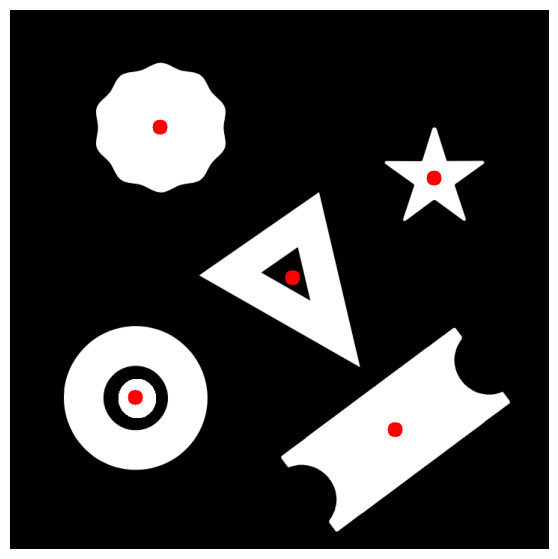

In [139]:
image1_copy = image1.copy()

# Loop over the contours
for contour in contours:

    # Get the image moments for the contour
    M = cv.moments(contour)
    
    # Calculate the centroid
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # Draw a circle to indicate the contour
    cv.circle(image1_copy,(cx,cy), 10, (255,0,0), -1)

# Display the results
plt.figure(figsize=[7,7])
plt.imshow(image1_copy)
plt.axis("off")

## **<font style="color:rgb(134,19,348)">Finding Contour Area</font>**
Area for a contour can be found using two methods. One is using the function **`cv.contourArea()`** as we have done before for sorting and retrieving the largest contour.

In [140]:
# Select a contour
contour = contours[1]

# Get the area of the selected contour
area_method1 = cv.contourArea(contour)

print('Area:',area_method1)

Area: 28977.5


Another method is to get the **`m00`** moment which contains the area of the contour.

In [141]:
# get selected contour moments
M = cv.moments(contour)

# Get the moment containing the Area
area_method2 = M['m00']

print('Area:',area_method2)

Area: 28977.5


## **<font style="color:rgb(134,19,348)">Contour Properties</font>**
When building an application using contours, information about contour properties is vital. These properties are often invariant to one or more transformations such as translation, scaling, and rotation. Below, we will have a look at some of these properties.

Let's start by detecting external contours of an image.

(-0.5, 511.5, 449.5, -0.5)

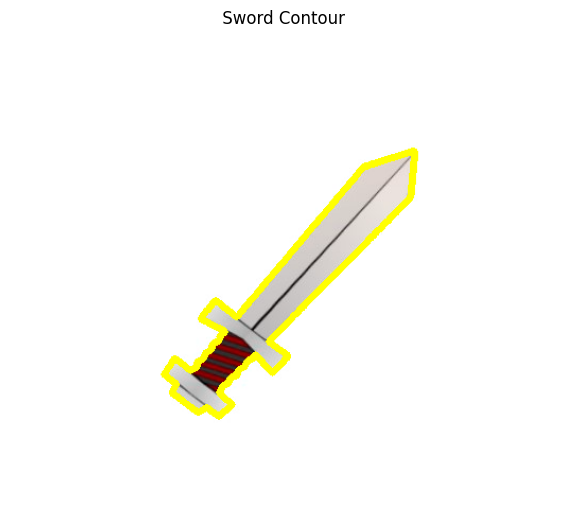

In [142]:
# Read the image
image4 = cv.imread(path + '\\sword.jpg') 

# Create a copy 
image4_copy = image4.copy()

# Convert to gray-scale
imageGray = cv.cvtColor(image4_copy,cv.COLOR_BGR2GRAY)

# create a binary thresholded image
_, binary = cv.threshold(imageGray, 220, 255, cv.THRESH_BINARY_INV)

# Detect and draw external contour
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Select a contour
contour = contours[0]

# Draw the selected contour
cv.drawContours(image4_copy, contour, -1, (255,255,0), 5)

# Display the result
plt.figure(figsize=[7,7])
plt.imshow(image4_copy)
plt.title(" Sword Contour")
plt.axis("off")

Applied rotation of angle: 270


(-0.5, 511.5, 449.5, -0.5)

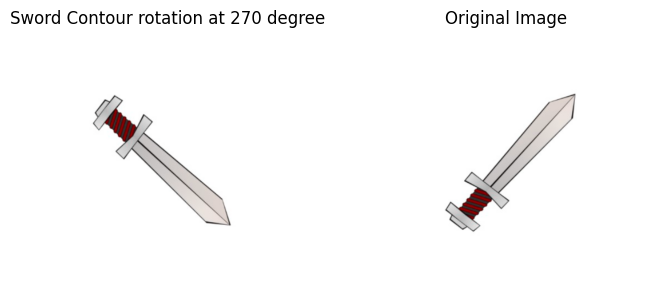

In [145]:

image4Copy = image4.copy()

# Get the dimensions of the image
rows,cols  = image4Copy.shape[:2]

angle = 270
# Create a rotational matrix
M = cv.getRotationMatrix2D((cols/2,rows/2),angle,1)
        
# Apply rotation
img = cv.warpAffine(image4Copy,M,(cols,rows), borderMode=1)
print("Applied rotation of angle: {}".format(angle))

# Display the result
plt.figure(figsize=[8,8])
plt.subplot(121)
plt.imshow(img)
plt.title(f"Sword Contour rotation at {angle} degree")
plt.axis("off")
plt.subplot(122)
plt.imshow(image4Copy)
plt.title("Original Image")
plt.axis("off")
